# Exploración de datos de transmisión musical: Springfield vs. Shelbyville

## Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [1.1 Observaciones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Valores ausentes](#missing_values)
    * [2.2 Duplicados](#duplicates)
    * [2.3 Observaciones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis comparativo](#activity)
    * [3.1 Análisis de comportamiento por día y ciudad](#activity_day)
    * [3.2 Análisis de comportamiento por género y ciudad](#activity_genre)
    * [3.3 Análisis de comportamiento por hora y ciudad](#activity_hour)
    * [3.4 Observaciones](#activity_conclusions)

* [Etapa 4. Prueba de hipótesis](#hypothesis)
* [Conclusiones](#conclusion)

## Introducción <a id='intro'></a>

El objetivo de este proyecto es analizar las preferencias musicales de los ciudadanos de Springfield y Shelbyville. Estudiando datos reales de transmisión de música online para probar hipótesis y comparar el comportamiento de los usuarios y las usuarias de estas dos ciudades.

### Objetivo:
Prueba la hipótesis:
1. La actividad de los usuarios y las usuarias difiere según el día de la semana y dependiendo de la ciudad.

### Etapas
Este proyecto se divide en cuatro etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Análisis comparativo.
 4. Prueba de hipótesis.


## Etapa 1. Descripción de los datos <a id='data_review'></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [60]:
reproductions= pd.read_csv("music_project_en.csv")
print(reproductions.head(10))

     userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                       Chains          Obladaet  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE                     L’estate       Julia Dalia  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

        City        time        Day  
0  Shelbyville  20:28:33  Wednesday  
1  Springfield  14:07:09     Friday  
2  Shelbyville  20:58:07  Wednesday  
3  Shelbyville  08:37:09     Monday  
4  Springfield  08:34:34     Monday  
5

In [61]:
print(reproductions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


la tabla contiene siete columnas.Según la documentación:

- `' userID'`: identificador del usuario o la usuaria;
- `'Track'`: título de la canción;
- `'artist'`: nombre del artista;
- `'genre'`: género de la pista;
- `'City'`: ciudad del usuario o la usuaria;
- `'time'`: la hora exacta en la que se reprodujo la canción;
- `'Day'`: día de la semana.

### 1.1 Observaciones <a id='data_review_conclusions'></a>

Se encuentra que todos los datos son de tipo texto, algunos encabezados están en mayúsculas y otros en minúsculas y hay espacios en algunos de ellos.De este modo, se procede a limpiar y organizar los datos en la siguiente etapa.

[Volver a Contenidos](#back)

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

El objetivo aquí es preparar los datos para que sean analizados.
El primer paso es resolver cualquier problema con los encabezados.Enriquecer o modifcar el dataframe para así, avanzar a los valores ausentes y duplicados. 


In [62]:
new_columns=[]
for columns in reproductions.columns:
    name_lowered=columns.lower()
    name_stripped=name_lowered.strip()
    new_columns.append(name_stripped)
    print(name_stripped) 
reproductions.columns=new_columns

userid
track
artist
genre
city
time
day


In [63]:
reproductions.rename(columns={"userid":"user_id"},inplace=True) # Cambiar el nombre de la columna "userid"
print(reproductions.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


In [64]:
reproductions['time'] =pd.to_datetime(reproductions['time'],format='%H:%M:%S')

In [65]:
reproductions['hour'] = reproductions['time'].dt.hour

### 2.1 valores ausentes <a id='missing_values'></a>

In [66]:
print(reproductions.isna().sum())

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
hour          0
dtype: int64


In [67]:
reproductions['track'].isna().sum()/reproductions['track'].count()

0.02107129408811347

Se presentan valores ausentes en tres columnas, de las cuales el género es el de mayor incidencia en el análisis para determinar las preferencias de la audiencia.
Estos valores ausentes  representan un 2,1% de los datos , un porcentaje poco significativo, estos se reemplazarán por un valor determinado "unknown" en las tres columnas.

In [68]:
columns_to_replace=["track","artist","genre"]

for col in columns_to_replace:
    reproductions[col] =reproductions[col].fillna("unknown")

In [69]:
reproductions.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
hour       0
dtype: int64

[Volver a Contenidos](#back)

### 2.2 Duplicados <a id='duplicates'></a>

In [70]:
print(reproductions.duplicated().sum())
print(reproductions.duplicated().sum()/len(reproductions))

3826
0.058790085895603805


Se encuentra 3867 datos duplicados que representan un 5,87% de los datos por lo que , eliminarlos no representa una cantidad que llegue a afectar el análisis.

In [71]:
reproductions=reproductions.drop_duplicates()

Ahora se procede a buscar los duplicados implicitos que pueden afectar el resultado.En este caso, la variable `genre` será estudiada para evitar algún error tipográfico que este generando duplicados. 

In [72]:
print(reproductions["genre"].unique())

['rock' 'pop' 'folk' 'dance' 'rusrap' 'ruspop' 'world' 'electronic'
 'unknown' 'alternative' 'children' 'rnb' 'hip' 'jazz' 'postrock' 'latin'
 'classical' 'metal' 'reggae' 'triphop' 'blues' 'instrumental' 'rusrock'
 'dnb' 'türk' 'post' 'country' 'psychedelic' 'conjazz' 'indie'
 'posthardcore' 'local' 'avantgarde' 'punk' 'videogame' 'techno' 'house'
 'christmas' 'melodic' 'caucasian' 'reggaeton' 'soundtrack' 'singer' 'ska'
 'salsa' 'ambient' 'film' 'western' 'rap' 'beats' "hard'n'heavy"
 'progmetal' 'minimal' 'tropical' 'contemporary' 'new' 'soul' 'holiday'
 'german' 'jpop' 'spiritual' 'urban' 'gospel' 'nujazz' 'folkmetal'
 'trance' 'miscellaneous' 'anime' 'hardcore' 'progressive' 'korean'
 'numetal' 'vocal' 'estrada' 'tango' 'loungeelectronic' 'classicmetal'
 'dubstep' 'club' 'deep' 'southern' 'black' 'folkrock' 'fitness' 'french'
 'disco' 'religious' 'hiphop' 'drum' 'extrememetal' 'türkçe'
 'experimental' 'easy' 'metalcore' 'modern' 'argentinetango' 'old' 'swing'
 'breaks' 'eurofolk' 

hip hop, es un género que se encuentra escrito de diferentes maneras, para esto se unificará en hiphop.

In [73]:
def replace_wrong_genres(wrong_genres,correct_genre):
    for wrong_genre in wrong_genres:
        reproductions["genre"].replace(wrong_genre,correct_genre)
    
wrong_genres=["hip","hop","hip-hop"]
correct_genre="hiphop"

replace_wrong_genres(wrong_genres,correct_genre)

### 2.3 Observaciones  <a id='data_preprocessing_conclusions'></a>

Al finalizar esta etapa se logra obtener una base de datos limpia, coherente y en el formato adecuado para el correcto análisis. 

[Volver a Contenidos](#back)

## Etapa 3. Análisis comparativo  <a id='activity'></a>

### 3.1 Análisis de comportamiento por día y ciudad  <a id='activity_day'></a>

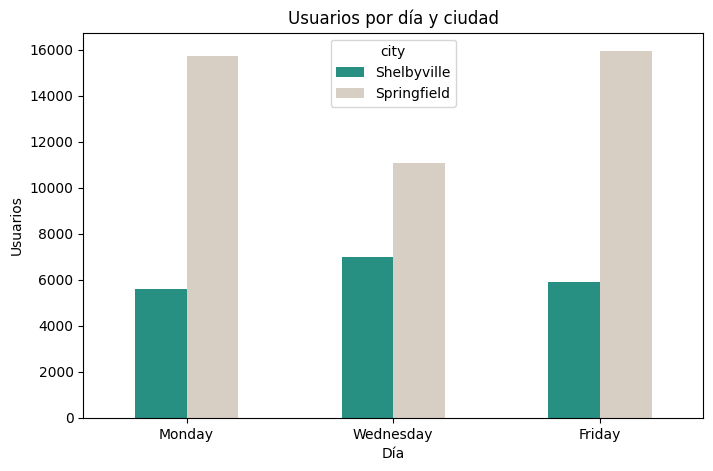

In [75]:
rep_per_day=reproductions.groupby(['day','city'])['user_id'].count().reset_index().sort_values('day',ascending=True)
orden_dias = ['Monday', 'Wednesday', 'Friday']
rep_per_day['day'] = pd.Categorical(rep_per_day['day'], categories=orden_dias, ordered=True)
rep_per_day.pivot(index='day', columns='city', values='user_id').plot(kind='bar',figsize=(8,5),color=["#288F83", '#D8CFC4'])
plt.xlabel('Día')
plt.ylabel('Usuarios')
plt.title('Usuarios por día y ciudad')
plt.xticks(rotation=360)

plt.show()

[Volver a Contenidos](#back)

La gráfica evidencia que los usuarios de Springfield son más activos los dias lunes y viernes en proporciones similares, mientras que los usuarios de Shelbyville lo son el día miércoles. De manera general también se logra ver una mayor actividad por parte de los ciudadanos de Springfield.

### 3.2 Análisis de comportamiento por género y ciudad <a id='activity_genre'></a>

In [76]:
reproductions['genre'].nunique()

269

Al haber 269 géneros distintos, para lograr un análisis visual más claro, nos centraremos en los 10 géneros más escuchados de cada ciudad.

In [77]:
top10 = (
    reproductions.groupby(['city', 'genre'])['user_id']
      .count()                         
      .reset_index()               
      .sort_values(['city', 'user_id'], ascending=[True, False])  
      .groupby('city')
      .head(10)                         
)

top10

,city,genre,user_id
139,Shelbyville,pop,2431
41,Shelbyville,dance,1932
160,Shelbyville,rock,1879
56,Shelbyville,electronic,1736
90,Shelbyville,hip,934
3,Shelbyville,alternative,649
33,Shelbyville,classical,646
164,Shelbyville,rusrap,564
163,Shelbyville,ruspop,538
201,Shelbyville,world,515


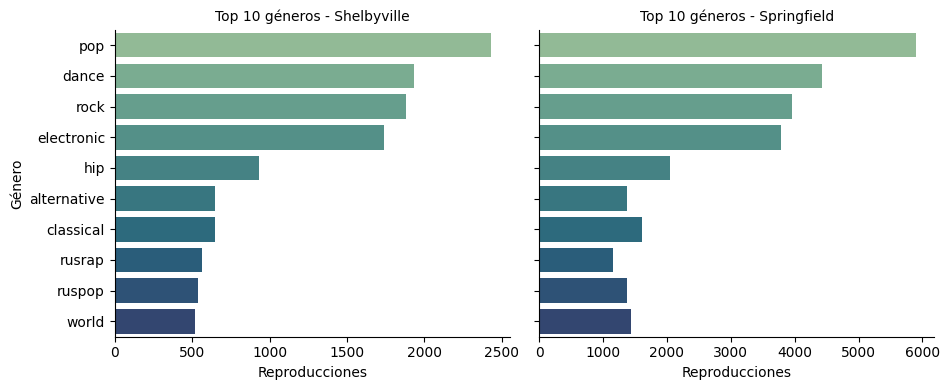

In [78]:
sns.set_palette(sns.color_palette(["#2A9D8F", "#D8CFC4"]))
graphic = sns.catplot(
    data=top10,
    kind='bar',
    x='user_id',
    y='genre',
    hue='genre',
    col='city',
    sharex=False,
    height=4,
    aspect=1.2,
    palette="crest"
)

graphic.set_titles("Top 10 géneros - {col_name}")
graphic.set_axis_labels("Reproducciones", "Género")
plt.tight_layout()
plt.show()

Mediante esta gráfica se evidencian los géneros más escuchados. Se puede resaltar la similitud de preferencias en ambas ciudades, exceptuando una mayor tendencia de música clásica en Springfield. De parte de Shelbyvile, en proporción a la cantidad menor de sus datos, hay una mayor preferencia de hip en comparación con la de Springfield.

### 3.3 Análisis de comportamiento por hora y ciudad <a id='activity_hour'></a>

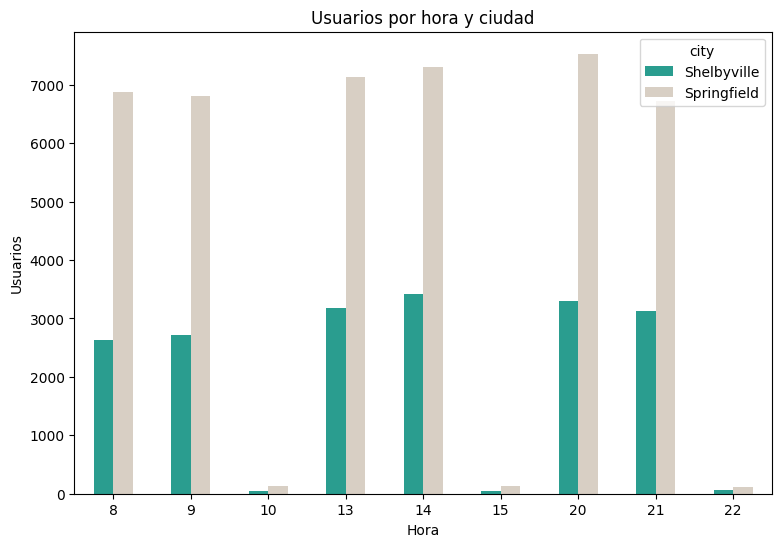

In [79]:
repr_per_hour = reproductions.groupby(['city','hour'])['user_id'].count().reset_index()
repr_per_hour.pivot(index='hour',columns='city',values='user_id').plot(kind='bar',figsize=(9,6),color=['#2A9D8F', '#D8CFC4'])
plt.xlabel('Hora')
plt.ylabel('Usuarios')
plt.title('Usuarios por hora y ciudad')
plt.xticks(rotation=360)
plt.show()

Los usuarios de ambas ciudades muestran tres picos de mayor actividad: 1 p.m, 2 p.m y 8 p.m en sus correspondientes proporciones. Así mismo, comparten los picos mas bajos desde 10 a.m a 1 p.m, 3 p.m a 8 p.m y de 10 p.m en adelante.

### 3.4 Observaciones <a id='activity_conclusions'></a>


 * El graficar los datos permite ver con mayor claridad la diferencia en los tamaños de muestra para este análisis, hay una mayor cantidad para la ciudad de Springfield.
 * Los usuarios de ambas ciudades comparten varias similitudes en actividad y preferencia musical como son las horas de mayor actividades y los géneros de mayor preferencia 
 * La mayor diferencia se encuntra en los días de mayor reproducción, mientras que los usuarios de springfield son mas activos los lunes y viernes, los usuarios en Shelbyville prefieren los miércoles por una leve diferencia.


[Volver a Contenidos](#back)

## Etapa 4. Prueba de hipótesis  <a id='hypothesis'></a>

El propósito de esta etapa es determinar si existe evidencia suficiente para concluir que la actividad de los usuarios difiere significativamente entre las dos ciudades.

In [80]:
proporciones = reproductions['city'].value_counts(normalize=True)*100
print(f"Springfield concentra el {proporciones['Springfield']:.1f}% de los registros, mientras que Shelbyville el {proporciones['Shelbyville']:.1f}%.")

Springfield concentra el 69.8% de los registros, mientras que Shelbyville el 30.2%.


Como se había visto en la etapa anterior, hay una muestra de datos mayor para la ciudad de Springfield en un 38 %, esto no permite que se logre una prueba coherente para evaluar una diferencia realmente significativa en los dos grupos. Para solucionar esto, se trabajará con una parte de la muestra de Springfield proporcional a la de Shelbyville.

In [81]:
n = reproductions[reproductions['city'] == 'Shelbyville'].shape[0]
balanced = pd.concat([
    reproductions[reproductions['city'] == 'Springfield'].sample(n, random_state=42),
    reproductions[reproductions['city'] == 'Shelbyville']
])

balanced_group=balanced.groupby(['city','day'])['user_id'].count().reset_index()
balanced_group

,city,day,user_id
0,Shelbyville,Friday,5895
1,Shelbyville,Monday,5614
2,Shelbyville,Wednesday,7003
3,Springfield,Friday,6884
4,Springfield,Monday,6841
5,Springfield,Wednesday,4787


In [82]:
shelb=balanced_group[balanced_group['city']=='Shelbyville']
spring=balanced_group[balanced_group['city']=='Springfield']

t_stat, p_value = stats.ttest_ind(shelb['user_id'],spring['user_id'],equal_var=False)
print(p_value)

if p_value<0.05:
    print('Rechazamos la hipótesis nula (H0): existe diferencia significativa en el comportamiento entre ambas ciudades.')
else:
    print('No podemos rechazar la hipotesis nula(H1): no hay una diferencia significativa en el comportamiento entre ambas ciudades.')

1.0
No podemos rechazar la hipotesis nula(H1): no hay una diferencia significativa en el comportamiento entre ambas ciudades.


## Conclusiones   <a id='conclusion'></a>


El análisis descriptivo inicial mostró patrones distintos entre Springfield y Shelbyville en términos de días de mayor actividad y preferencias de género musical. Sin embargo, tras realizar la prueba de hipótesis con un grupo balanceado, **no se encontró evidencia estadística suficiente para concluir que exista una diferencia significativa entre ambas ciudades en cuanto al número promedio de reproducciones**.

En conjunto, los hallazgos se resumen de la siguiente manera:

Springfield parece mostrar mayor actividad los lunes y viernes, mientras que Shelbyville alcanza su punto máximo los miércoles; no obstante, estas diferencias no resultaron estadísticamente significativas al analizar los datos balanceados.

Aunque Springfield destacó por un mayor interés en música clásica y Shelbyville por el hip hop, estas variaciones deben interpretarse con cautela, ya que la falta de significancia estadística indica que pueden deberse al tamaño desigual de los datos o a variabilidad natural del muestreo.

Ambas ciudades comparten horas de mayor actividad musical similares (1, 2 y 8 pm), lo cual refuerza la idea de patrones comunes en el comportamiento de escucha.

En conclusión, si bien la exploración visual sugiere tendencias diferenciadas, **la prueba estadística rechaza afirmar diferencias sólidas entre ambas ciudades**, por lo que se recomienda recopilar una base de datos más equilibrada y amplia antes de establecer conclusiones definitivas sobre hábitos culturales o preferencias musicales.

